In [27]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
S = np.load("train_data.npy")
V = np.load("validation_data.npy")
T = np.load("test_data.npy")

Polynomial of degree n: $(w_{0} + w_{1}x + w_{2}x^2 + ... + w_{n}x^n)$

In [61]:
def psi_func(n,dataset):
    X = dataset[:,0]
    num = np.shape(dataset)[0]
    si = np.zeros((n + 1, num))
    for i in range(n + 1):
        for j in range(num):
            si[i,j] = X[j] ** i   
    return si
            
def h(n,dataset):
    num = np.shape(dataset)[0] # number of data
    X = dataset[:,0]
    Y = dataset[:, 1]    
    psi = psi_func(n,dataset)
    A = psi @ np.transpose(psi)
    B = psi @ Y
    if np.shape(A) == ():
        W = A**(-1) * Y
    else:
        W = np.linalg.inv(A) @ B 
    return W

def MSE(n,dataset,W):
    
    num = np.shape(dataset)[0]
    Y = dataset[:, 1]  
    psi = psi_func(n,dataset)
    est = np.transpose(W) @ psi
    
    error = 0
    for i in range(num):
        error = error + (est[i] - Y[i])**2
    error = error / num
    return error
    
    

        
    
    

Empirical risk =  [0.76180387 0.25136046 0.24056692 0.1480787  0.12273473 0.08872309
 0.08871247 0.04482113 0.04460211 0.04074881 0.03870594 0.03868863
 0.03603302 0.03423679 0.03314245]


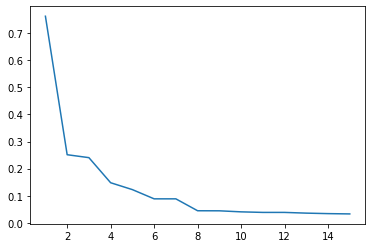

In [64]:
empirical_risk = np.zeros(15)
v_risk = np.zeros(15)

for i in range(15):
    W = h(i + 1, S)
    empirical_risk[i] = MSE(i + 1, S, W)
    v_risk[i] = MSE(i + 1, V, W)

plt.plot(np.arange(15) + 1,empirical_risk)
print("Empirical risk = ", empirical_risk)

True risk of V dataset =  [ 1.10114131  0.51751891  0.43354164  0.37267375  0.50341821  0.69735437
  0.70672655  0.11129319  0.1342869   0.9009469   3.27151552  2.72464724
 20.38626341  1.45518846 52.6946623 ]


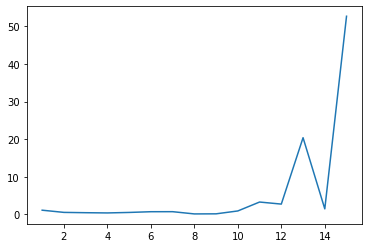

In [63]:
plt.plot(np.arange(15) + 1,v_risk)
print("True risk of V dataset = ", v_risk)


In [67]:
W = h(8, S)
print("True risk of T dataset = ",MSE(8, T, W))

True risk of T dataset =  0.11791424797140455
